In [51]:
#standard imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [52]:
#actual dataset is quite large, so first looking at filters first
#a glance at all these they can be imported as categories to save memory
indicators = pd.read_csv('ZILLOW_INDICATORS.csv')
regions = pd.read_csv('ZILLOW_REGIONS.csv')
print(indicators.head(),indicators.info())
print(regions.head(),regions.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   indicator_id  56 non-null     object
 1   indicator     56 non-null     object
 2   category      56 non-null     object
dtypes: object(3)
memory usage: 1.4+ KB
  indicator_id                                          indicator  \
0         SAAW  Median Sale Price (Smooth & Seasonally Adjuste...   
1         SRAM        Median Sale Price (Raw, All Homes, Monthly)   
2         NSAM  Median Days to Pending (Smooth, All Homes, Mon...   
3         RSNA  ZORI (Smoothed): All Homes Plus Multifamily Ti...   
4         RSSA  ZORI (Smoothed, Seasonally Adjusted): All Home...   

              category  
0  Inventory and sales  
1  Inventory and sales  
2  Inventory and sales  
3              Rentals  
4              Rentals   None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89305 entries, 0 to 89304
Da

In [53]:
#based on info, we can set indexes with id columns and change types to categories for others
indicators = indicators.astype({'indicator_id': 'string', 'indicator': 'category', 'category': 'category'})
regions = regions.astype({'region_type': 'category', 'region': 'category'})
indicators.set_index('indicator_id')
regions.set_index('region_id')
print(indicators)
print(regions)

   indicator_id                                          indicator  \
0          SAAW  Median Sale Price (Smooth & Seasonally Adjuste...   
1          SRAM        Median Sale Price (Raw, All Homes, Monthly)   
2          NSAM  Median Days to Pending (Smooth, All Homes, Mon...   
3          RSNA  ZORI (Smoothed): All Homes Plus Multifamily Ti...   
4          RSSA  ZORI (Smoothed, Seasonally Adjusted): All Home...   
5          ZATT           ZHVI All Homes- Top Tier Time Series ($)   
6          ZSFH           ZHVI Single-Family Homes Time Series ($)   
7          ZALL  ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)   
8          ZCON                   ZHVI Condo/Co-op Time Series ($)   
9          ZABT        ZHVI All Homes- Bottom Tier Time Series ($)   
10         Z5BR                    ZHVI 5+ Bedroom Time Series ($)   
11         Z2BR                     ZHVI 2-Bedroom Time Series ($)   
12         Z3BR                     ZHVI 3-Bedroom Time Series ($)   
13         Z1BR     

In [54]:
#based  on the indicators, we'll start with pulling data just for the 'home values' category
home_values_indicators = indicators[indicators['category'] == 'Home values'].copy()
print(home_values_indicators)

   indicator_id                                          indicator  \
5          ZATT           ZHVI All Homes- Top Tier Time Series ($)   
6          ZSFH           ZHVI Single-Family Homes Time Series ($)   
7          ZALL  ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)   
8          ZCON                   ZHVI Condo/Co-op Time Series ($)   
9          ZABT        ZHVI All Homes- Bottom Tier Time Series ($)   
10         Z5BR                    ZHVI 5+ Bedroom Time Series ($)   
11         Z2BR                     ZHVI 2-Bedroom Time Series ($)   
12         Z3BR                     ZHVI 3-Bedroom Time Series ($)   
13         Z1BR                     ZHVI 1-Bedroom Time Series ($)   
14         Z4BR                     ZHVI 4-Bedroom Time Series ($)   

       category  
5   Home values  
6   Home values  
7   Home values  
8   Home values  
9   Home values  
10  Home values  
11  Home values  
12  Home values  
13  Home values  
14  Home values  


In [55]:
#the zillow_data csv is quite large, so we'll bring in a sample subset 
df = pd.read_csv('ZILLOW_DATA.csv',nrows=500)
print(df.head(), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   indicator_id  500 non-null    object 
 1   region_id     500 non-null    int64  
 2   date          500 non-null    object 
 3   value         500 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB
  indicator_id  region_id        date     value
0         ZATT       3101  1998-01-31  338849.0
1         ZATT       3101  1998-02-28  342993.0
2         ZATT       3101  1998-03-31  346763.0
3         ZATT       3101  1998-04-30  349356.0
4         ZATT       3101  1998-05-31  351981.0 None


In [66]:
#from this sample subset we can change some subtypes and parse by date when reading a bigger portion of the csv in
#we will also only want to read in the home value category, which we will need a function for
not_home_values = indicators[indicators['category'] != 'Home values']
print(not_home_values['indicator_id'])
home_values = pd.read_csv('ZILLOW_DATA.csv',dtype={'indicator_id':'string'},skiprows= lambda x: x in not_home_values['indicator_id'],parse_dates=['date'])
print(home_values.head(),home_values.info())
print(home_values['indicator_id'].unique())

0     SAAW
1     SRAM
2     NSAM
3     RSNA
4     RSSA
15    ISAW
16    SSAW
17    IRAM
18    CRSM
19    CSSM
20    MSAM
21    IRAW
22    MRAM
23    SSSW
24    LSSM
25    CSAW
26    ISSM
27    SASW
28    MRAW
29    LRAM
30    ISSW
31    MSAW
32    LSAM
33    CRAM
34    ISAM
35    IRSM
36    SRSW
37    LSAW
38    NRAW
39    NSAW
40    CRSW
41    SSAM
42    IRSW
43    NRAM
44    CRAW
45    LRSM
46    SASM
47    SSSM
48    SAAM
49    LRAW
50    CSAM
51    SRAW
52    CSSW
53    LRSW
54    SRSM
55    LSSW
Name: indicator_id, dtype: string


ValueError: Missing column provided to 'parse_dates': 'date'

In [58]:
#lets get yearly mean/median data. with some larger values within the dataset, median may be more accurate, so we will look at both
home_values['year'] = home_values['date'].dt.year
summary_yr = home_values.groupby('year')['value'].agg(['mean','median']).reset_index()
summary_yr = summary_yr.round({'mean': 2, 'median': 0})
print(summary_yr.head(),summary_yr.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    30 non-null     int32  
 1   mean    30 non-null     float64
 2   median  30 non-null     float64
dtypes: float64(2), int32(1)
memory usage: 728.0 bytes
   year       mean    median
0  1996  141338.20  115749.0
1  1997  145422.93  118913.0
2  1998  151442.68  122628.0
3  1999  158770.94  126769.0
4  2000  164579.61  127276.0 None


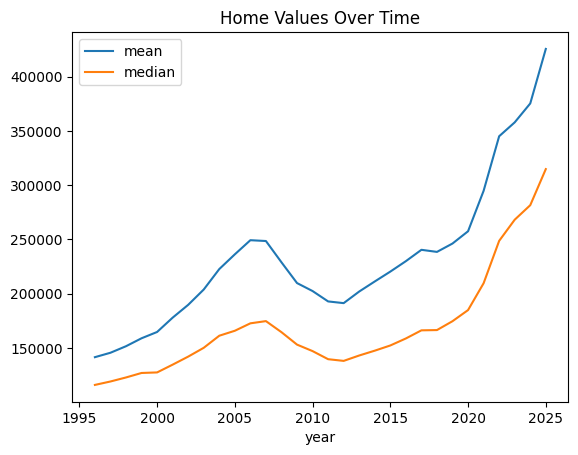

In [ ]:
#quick graph of mean, median over time for all home values
summary_yr.plot(x='year', y=['mean', 'median'])
plt.title('Home Values Over Time')
plt.show()

In [ ]:
#lets do summary stats by year and and indicator
summary_by_category = home_values.groupby(['year','indicator_id'])['value'].agg(['mean', 'median']).reset_index()
print(summary_by_category.head(),summary_by_category.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          800 non-null    int32  
 1   indicator_id  800 non-null    string 
 2   mean          800 non-null    float64
 3   median        800 non-null    float64
dtypes: float64(2), int32(1), string(1)
memory usage: 22.0 KB
   year indicator_id           mean    median
0  1996         Z1BR   99020.626156   86937.0
1  1996         Z2BR  104959.091193   91787.0
2  1996         Z3BR  129600.557648  110795.0
3  1996         Z4BR  167689.078100  142835.0
4  1996         Z5BR  222678.336188  182886.0 None


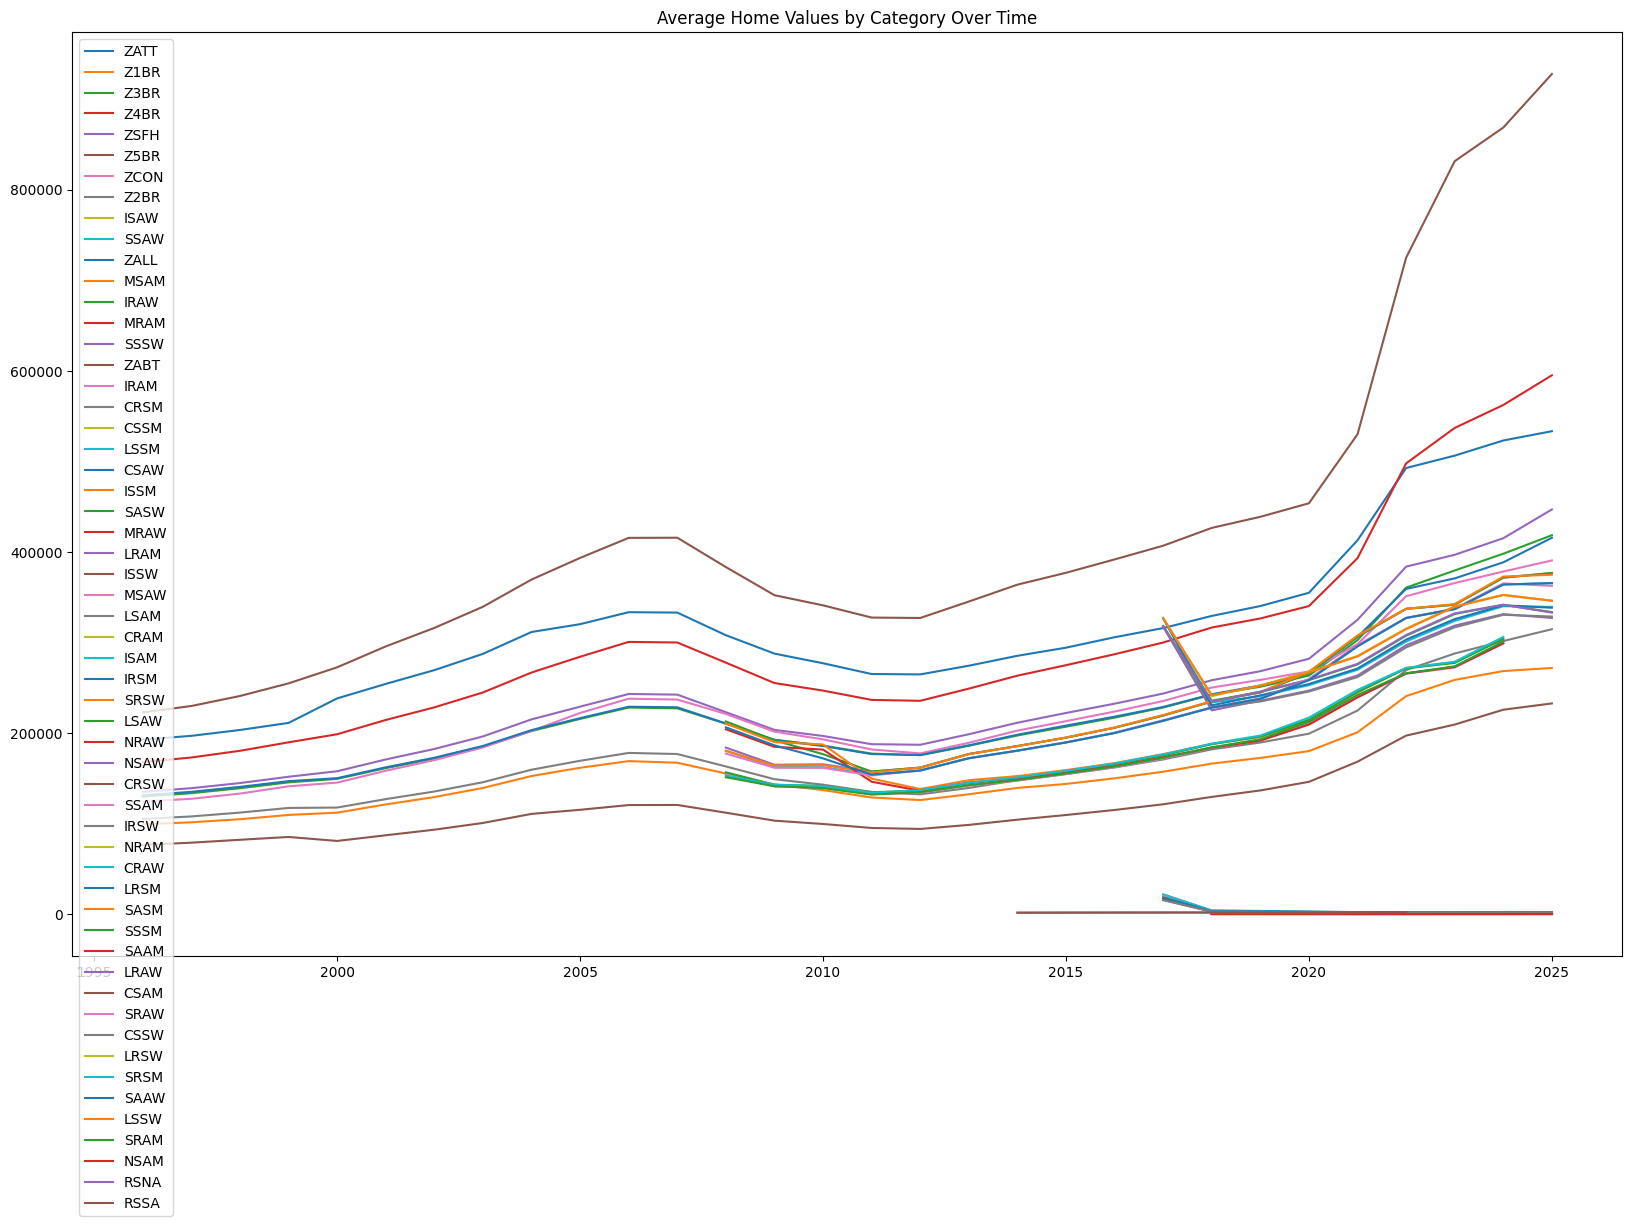

In [ ]:
temp_df = pd.DataFrame()
fig, ax = plt.subplots(figsize=(20,12))
for indicator in home_values['indicator_id'].unique():
    temp_df = summary_by_category[summary_by_category['indicator_id'] == indicator]
    ax.plot('year', 'mean', data=temp_df, label = indicator)
plt.title('Average Home Values by Category Over Time')
plt.legend()
plt.show()